# Final experiments

In [29]:
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
AZURE = None

from azure.quantum.qiskit import AzureQuantumProvider
import time

def _get_azure_provider():
    global AZURE
    if AZURE is None:
        AZURE = AzureQuantumProvider(
                resource_id = "...",
                location = "eastus"
        )
    return AZURE


def _get_ionq_backend(realqpu):
    provider = _get_azure_provider()
    simulator_backend = provider.get_backend("ionq.qpu" if realqpu else "ionq.simulator")
    return simulator_backend


def run_azure_ionq(circuit, qpu, shots=100):
    start = time.time()
    
    if qpu.name() != 'qasm_simulator':
        job = qpu.run(circuit, shots=shots)
        job_id = job.id()
        print("Job id", job_id)
        job_monitor(job)
        print(f"{time.time() - start:3f} seconds spent")
    else:
        job = execute(circuit, shots=shots, backend=qpu)
        print('local simulation')
    return job.result()

In [4]:
SIMULATOR = _get_ionq_backend(False)
QPU = _get_ionq_backend(True)

In [5]:
from qiskit import BasicAer
QASM = BasicAer.get_backend('qasm_simulator')

In [156]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

MEGA = 1e6
GIGA = 1e9
MICRO = 1e-6
NANO = 1e-9


def read_signal_txt(xfile, yfile, timescale=1e-9):
    with open(xfile, 'r') as f:
        x = np.array([float(d) * timescale for d in f.readlines()])
    with open(yfile, 'r') as f:
        y = np.array([float(d) for d in f.readlines()])
    return x, y


def read_signal_dat(file, timescale=1e-9):
    with open(file, 'r') as f:
        x = np.array([[float(x[0]) * timescale, float(x[1])] for x in [d.split() for d in f.readlines()]])
    return x[:,0], x[:, 1]

In [157]:
I0x, I0y = read_signal_txt(
                'oscillations/new_data/echo_x.txt', 
                'oscillations/new_data/echo_y.txt')

R0x, R0y = read_signal_dat('oscillations/new_data/Jeshcke_Biad_80K_Qband.dat')
R1x, R1y = read_signal_dat('oscillations/new_data/TbypT_Birad_RT_Xband.dat')
R2x, R2y = read_signal_dat('oscillations/new_data/Test_Birad_80K_Qband.dat')

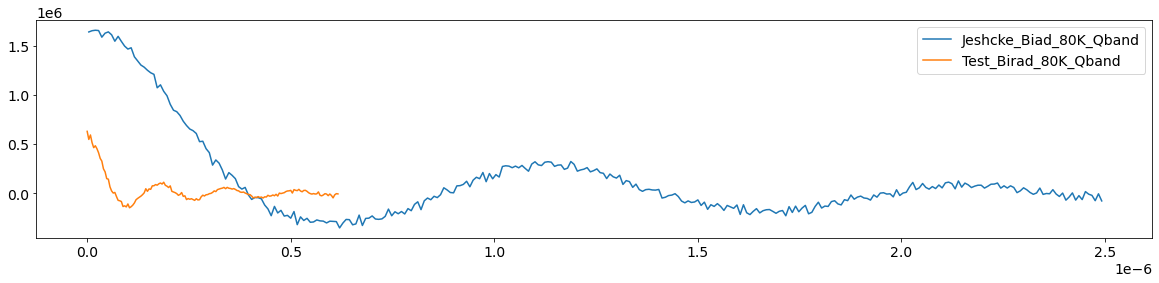

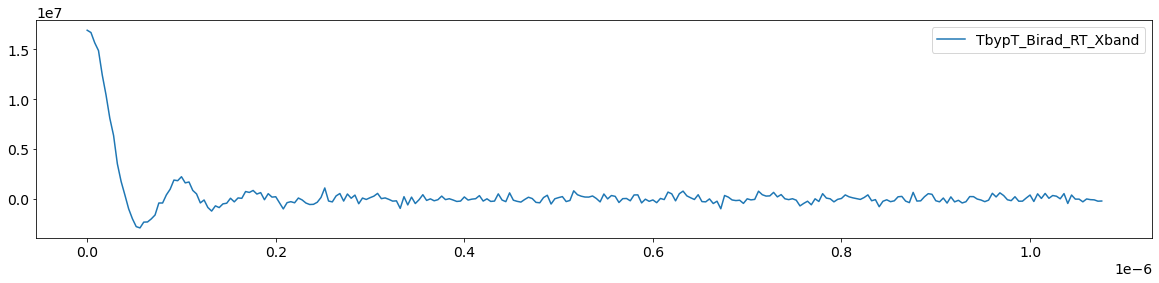

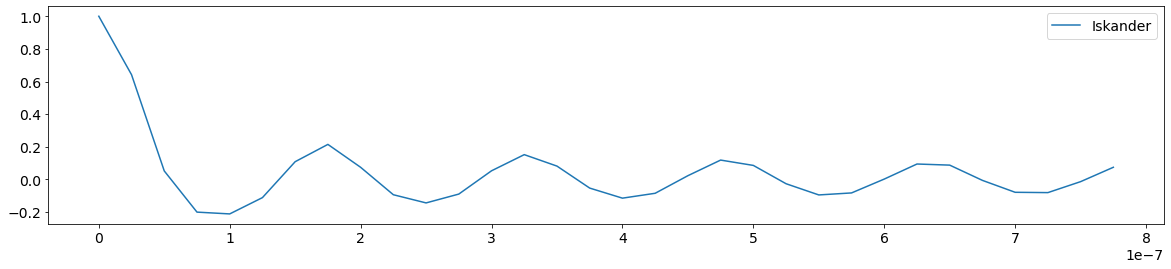

In [158]:
plt.figure(figsize=(20, 4))
plt.plot(R0x, R0y, label='Jeshcke_Biad_80K_Qband')
plt.plot(R2x, R2y, label='Test_Birad_80K_Qband')
plt.legend()
plt.show()
plt.figure(figsize=(20, 4))
plt.plot(R1x, R1y, label='TbypT_Birad_RT_Xband')
plt.legend()
plt.show()
plt.figure(figsize=(20, 4))
plt.plot(I0x, I0y, label='Iskander')
plt.legend()
plt.show()

In [159]:
def subsample(x, y, shift, step, N):
    i = 0
    while x[i] < shift: i += 1
    result = x[i:i + (step * N):step], y[i:i + (step * N):step]
    return result

In [160]:
R032x, R032y = subsample(R0x, R0y, shift=396 * NANO, step=8, N=32)
R132x, R132y = subsample(R1x, R1y, shift=44 * NANO, step=2, N=32)
R232x, R232y = subsample(R2x, R2y, shift=72 * NANO, step=4, N=32)

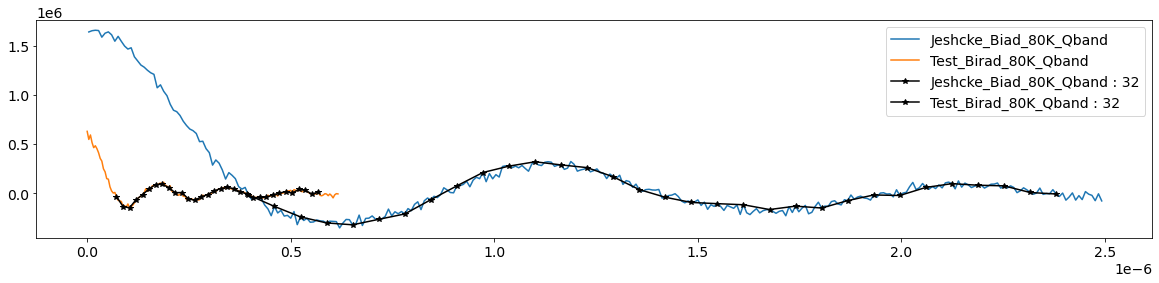

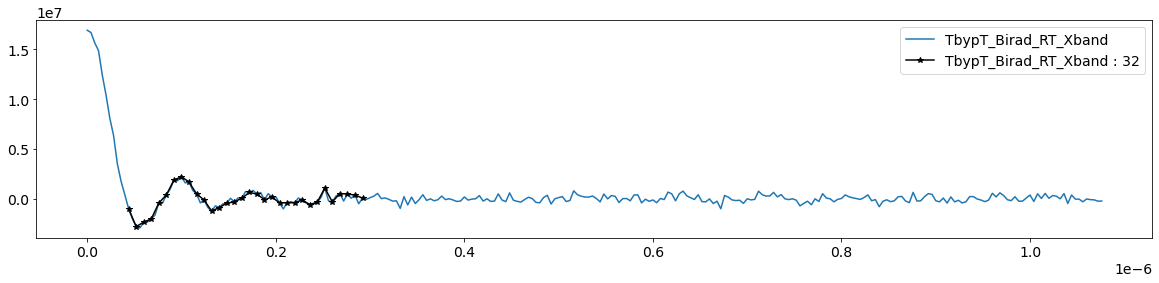

In [161]:
plt.figure(figsize=(20, 4))
plt.plot(R0x, R0y, label='Jeshcke_Biad_80K_Qband')
plt.plot(R2x, R2y, label='Test_Birad_80K_Qband')
plt.plot(R032x, R032y, label='Jeshcke_Biad_80K_Qband : 32', c='black', marker="*")
plt.plot(R232x, R232y, label='Test_Birad_80K_Qband : 32', c='black', marker="*")
plt.legend()
plt.show()
plt.figure(figsize=(20, 4))
plt.plot(R1x, R1y, label='TbypT_Birad_RT_Xband')
plt.plot(R132x, R132y, label='TbypT_Birad_RT_Xband : 32', c='black', marker="*")
plt.legend()
plt.show()

In [162]:
def fft(x, y):
    fy = np.fft.fft(y)
    fx = np.fft.fftfreq(len(y), x[1] - x[0])
    data = np.array(sorted(list(zip(fx, fy))))
    return data[:, 0].real, abs(data[:, 1])

def norm(x, y):
    return x, (y / max(y))

In [163]:
FR0x, FR0y = norm(*fft(R0x, R0y))
FR1x, FR1y = norm(*fft(R1x, R1y))
FR2x, FR2y = norm(*fft(R2x, R2y))

FR032x, FR032y = norm(*fft(R032x, R032y))
FR132x, FR132y = norm(*fft(R132x, R132y))
FR232x, FR232y = norm(*fft(R232x, R232y))
FI0x, FI0y = norm(*fft(I0x, I0y))

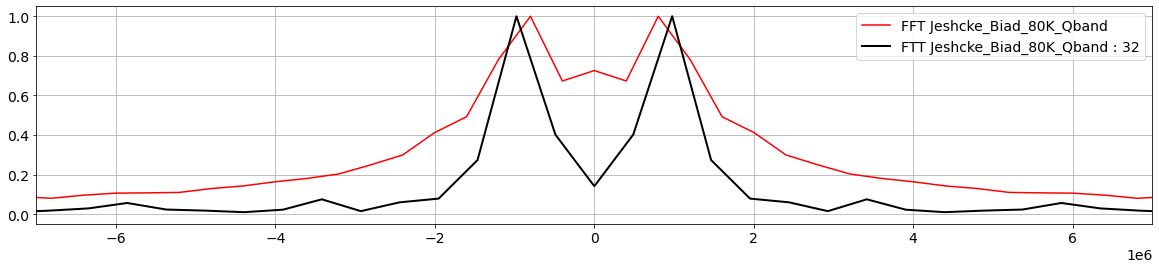

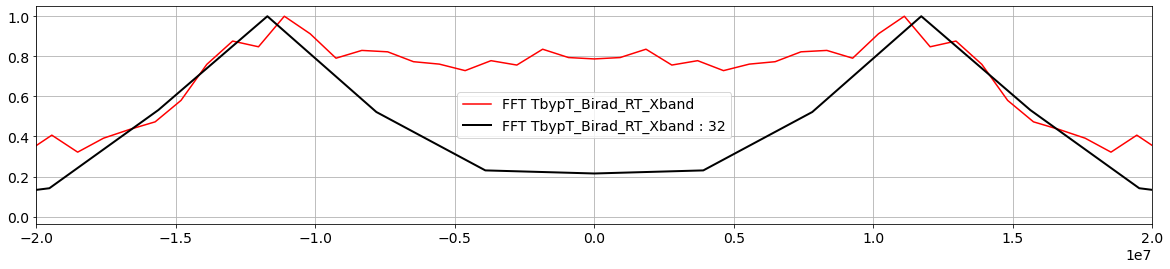

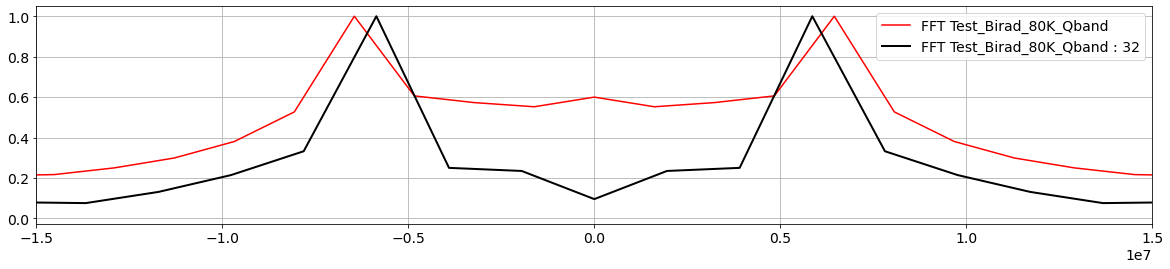

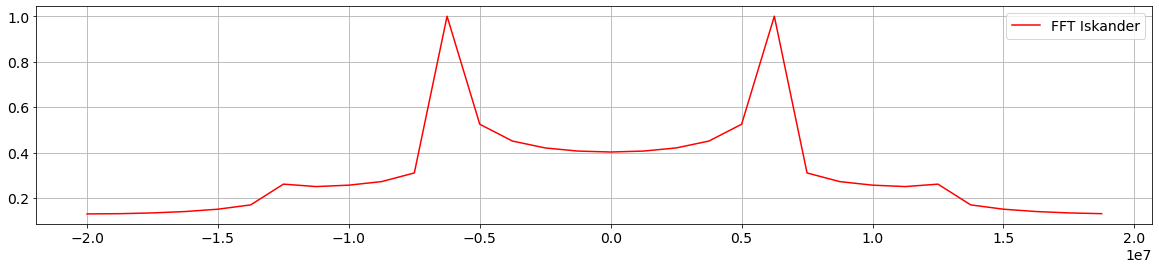

In [165]:
plt.figure(figsize=(20, 4))
plt.xlim((-7e6, 7e6))
plt.plot(FR0x, FR0y, label="FFT Jeshcke_Biad_80K_Qband", c='red')
plt.plot(FR032x, FR032y, label="FTT Jeshcke_Biad_80K_Qband : 32", lw=2, c='black')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 4))
plt.xlim((-2e7, 2e7))
plt.plot(FR1x, FR1y, label="FFT TbypT_Birad_RT_Xband", c='red')
plt.plot(FR132x, FR132y, label="FFT TbypT_Birad_RT_Xband : 32", lw=2, c='black')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 4))
plt.xlim((-1.5e7, 1.5e7))
plt.plot(FR2x, FR2y, label="FFT Test_Birad_80K_Qband", c='red')
plt.plot(FR232x, FR232y, label="FFT Test_Birad_80K_Qband : 32", lw=2, c='black')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 4))

plt.plot(FI0x, FI0y, label="FFT Iskander", c='red')
plt.grid()
plt.legend()
plt.show()

In [166]:
import math
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute #, IBMQ
from qiskit.circuit.library import QFT
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram, plot_circuit_layout
import matplotlib.pyplot as plt

from qiskit_ionq import IonQProvider

def get_circuit(data):
    dim = math.ceil(math.log2(len(data)))
    print("Required qubits:", dim)
    data_padded = np.zeros((2 ** dim,))
    data_padded[:len(data)] = data
    data_normed = data_padded / np.linalg.norm(abs(data_padded))
    qr = QuantumRegister(dim, name="qubits")
    cr = ClassicalRegister(dim, name="classical")
    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(data_normed)
    circuit.barrier()
    circuit.append(QFT(dim), qr)
    circuit.barrier()
    circuit.measure(qr, cr)
    return circuit

In [167]:
CI0 = get_circuit(I0y)
CR00 = get_circuit(R032y)
CR10 = get_circuit(R132y)
CR20 = get_circuit(R232y)

Required qubits: 5
Required qubits: 5
Required qubits: 5
Required qubits: 5


In [168]:
CTI0 = transpile(CI0, backend=SIMULATOR)
CTR00 = transpile(CR00, backend=SIMULATOR)
CTR10 = transpile(CR10, backend=SIMULATOR)
CTR20 = transpile(CR20, backend=SIMULATOR)
print("Iskander:", CTI0.depth())
print("Jeshcke_Biad_80K_Qband:", CTR00.depth())
print("TbypT_Birad_RT_Xband:", CTR10.depth())
print("Test_Birad_80K_Qband:", CTR20.depth())

Iskander: 115
Jeshcke_Biad_80K_Qband: 121
TbypT_Birad_RT_Xband: 111
Test_Birad_80K_Qband: 121


In [169]:
def clean(data, threshold):
    newdata = []
    for i, gate in enumerate(data):
        if gate[0].name == 'reset':
            print('-init;', end=' ')
            continue
            
        if gate[0].name == 'ry':
            if abs(gate[0]._params[0]) <= threshold:
                print(f'-ry{gate[0]._params[0]:.3f};', end=' ')
                continue
                
        if gate[0].name == 'rz':
            if abs(gate[0]._params[0]) <= threshold:
                print('-rz;', end=' ')
                continue
                
        if gate[0].name == 'u':
            a, b, c = gate[0]._params
            if a == b == 0 and abs(c) <= threshold:
                print('-u;', end=' ')
                continue

        if gate[0].name == 'u':
            a, b, c = gate[0]._params
            if abs(a) <= threshold and abs(b) <= threshold and abs(c) <= threshold:
                print('-u;', end=' ')
                continue 
        newdata.append(gate)
    print()
    
    #todo remove CX
    i = len(newdata) - 1
    while i >= 0 and newdata[i][0].name != 'swap':
        i -= 1
    e = i
    while i >= 0 and newdata[i][0].name == 'swap':
        i -= 1
    if i > 0:
        return newdata[:i+1] + newdata[e+1:]
    else:
        return newdata
    
def collapse(data):
    newdata = []
    olddata = list(data)
    for i, _ in enumerate(data):
        gate = olddata[i]
        
        if gate is None:
            print("-cx;", end=" ")
            continue
        
        if gate[0].name == 'cx':
            gate_1 = olddata[i+1]
            gate_2 = olddata[i+2]

            if gate_1 is not None and gate_2 is not None and gate_2[0].name == 'cx' and gate_1[0].name == 'cx':
                if gate_2[1] == gate[1]:
                    print('Matching CX pair... ', end="")
                    olddata[i+2] = None
                    continue
        newdata.append(gate)
    return newdata

In [170]:
def do_clean(circuit):
    circuit.data = clean(circuit.data,  50 * np.pi * 1e-3)
    print(circuit.depth())
    for i in range(5):
        circuit.data = collapse(circuit.data)
        print("Depth:", circuit.depth())    

In [171]:
do_clean(CTI0)
print("=========================")
do_clean(CTR00)
print("=========================")
do_clean(CTR10)
print("=========================")
do_clean(CTR20)

-ry-0.074; -ry-0.056; -ry-0.155; -ry-0.028; -ry-0.133; -ry-0.079; -ry0.047; -ry-0.071; -ry0.122; -ry-0.040; -ry-0.115; -ry-0.061; -ry-0.011; -ry-0.011; 
100
Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Depth: 94
Depth: 94
Depth: 94
Depth: 94
Depth: 94
-ry-0.036; -ry-0.071; -ry0.113; -ry-0.001; -ry-0.039; -ry0.028; -ry-0.009; -ry0.068; -ry0.079; -ry0.075; -ry0.012; -ry0.062; -ry-0.058; -ry-0.003; -ry-0.009; -ry0.131; -ry0.013; -ry-0.009; 
102
Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Depth: 96
Matching CX pair... -cx; Depth: 94
Matching CX pair... -cx; Depth: 92
Depth: 92
Depth: 92
-ry-0.015; -ry-0.106; -ry-0.028; -ry0.155; -ry0.015; -ry-0.101; -ry0.054; -ry-0.015; -ry0.063; -ry0.029; -ry0.120; -ry0.032; 
98
Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Depth: 92
Depth: 92
Depth: 92
Depth: 92
Depth: 92
-ry-0.035; -ry0.125; -ry0.062; -ry0.024; -ry-0.049; -ry0.136; -ry0.046; -ry0.020; -ry0.005; -ry

In [172]:
result = run_azure_ionq(CTI0, qpu=QASM, shots=1000)
raw_iskander = result.get_counts()

result = run_azure_ionq(CTR00, qpu=QASM, shots=1000)
HCTR00 = result.get_counts()

result = run_azure_ionq(CTR10, qpu=QASM, shots=1000)
HCTR10 = result.get_counts()

result = run_azure_ionq(CTR20, qpu=QASM, shots=1000)
HCTR20 = result.get_counts()

local simulation
local simulation
local simulation
local simulation


In [173]:
print("Iskander =", raw_iskander)
print("Jeshcke_Biad_80K_Qband =", HCTR00)
print("TbypT_Birad_RT_Xband =", HCTR10)
print("Test_Birad_80K_Qband =", HCTR20)

Iskander = {'11011': 227, '00100': 73, '10100': 237, '01111': 22, '11111': 23, '10011': 27, '10000': 27, '01100': 34, '00000': 25, '01110': 4, '00011': 17, '11000': 35, '00010': 20, '01000': 29, '01011': 30, '00111': 61, '01010': 8, '11110': 3, '11101': 10, '01001': 4, '10111': 30, '00110': 2, '11100': 24, '10010': 13, '10001': 2, '01101': 9, '00001': 2, '11010': 1, '11001': 1}
Jeshcke_Biad_80K_Qband = {'01000': 416, '01111': 386, '10111': 30, '11111': 66, '10000': 56, '11000': 23, '00100': 3, '01011': 2, '10101': 3, '11001': 1, '10100': 2, '00000': 6, '00010': 1, '00110': 1, '10011': 1, '00011': 1, '11010': 2}
TbypT_Birad_RT_Xband = {'10111': 275, '00110': 9, '11000': 263, '01111': 71, '10010': 3, '00111': 97, '00101': 14, '10011': 4, '11011': 10, '01001': 9, '11111': 17, '01000': 72, '10000': 9, '00001': 2, '00100': 82, '11100': 9, '11101': 2, '01101': 5, '01010': 8, '01110': 9, '10100': 4, '00000': 18, '10001': 1, '11001': 3, '00010': 3, '10101': 1}
Test_Birad_80K_Qband = {'11000': 

In [174]:
def to_values(x, counts_raw, N=5, reorder=True):
    f = "{0:0" + str(N) + "b}"
    for i in range(2 ** N):
        if f.format(i) not in counts_raw:
            counts_raw[f.format(i)] = 0
    ints = [[int(k[::-1] if reorder else k, base=2), v] for (k, v) in counts_raw.items()]
    ints = sorted(ints)
    # negative frequencies
    ints = ints[len(ints) // 2:] + ints[:len(ints) // 2]
    y = np.array(ints)[:, 1]
    return norm(x, y)

In [175]:
QI0x, QI0y = to_values(FI0x, raw_iskander, reorder=True)
QR032x, QR032y = to_values(FR032x, HCTR00, reorder=True)
QR132x, QR132y = to_values(FR132x, HCTR10, reorder=True)
QR232x, QR232y = to_values(FR232x, HCTR20, reorder=True)

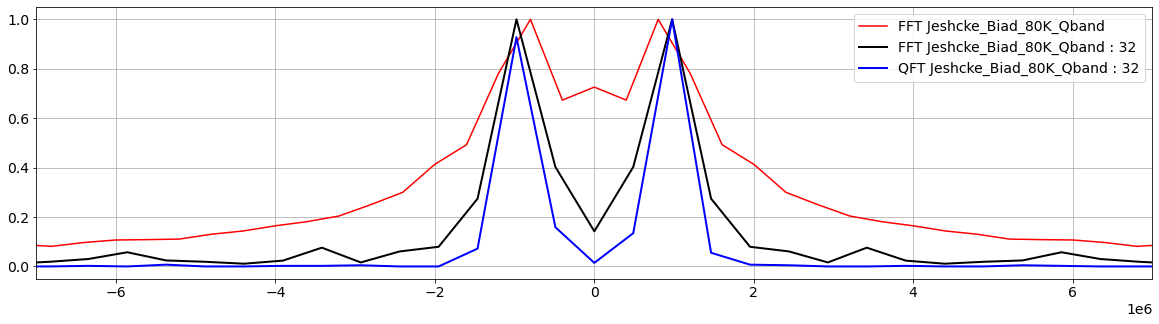

In [176]:
plt.figure(figsize=(20, 5))
plt.xlim((-7e6, 7e6))
plt.plot(FR0x, FR0y, label="FFT Jeshcke_Biad_80K_Qband", c='red')
plt.plot(FR032x, FR032y, label="FFT Jeshcke_Biad_80K_Qband : 32", lw=2, c='black')
plt.plot(QR032x, QR032y, label="QFT Jeshcke_Biad_80K_Qband : 32", lw=2, c='blue')
plt.grid()
plt.legend()
plt.show()

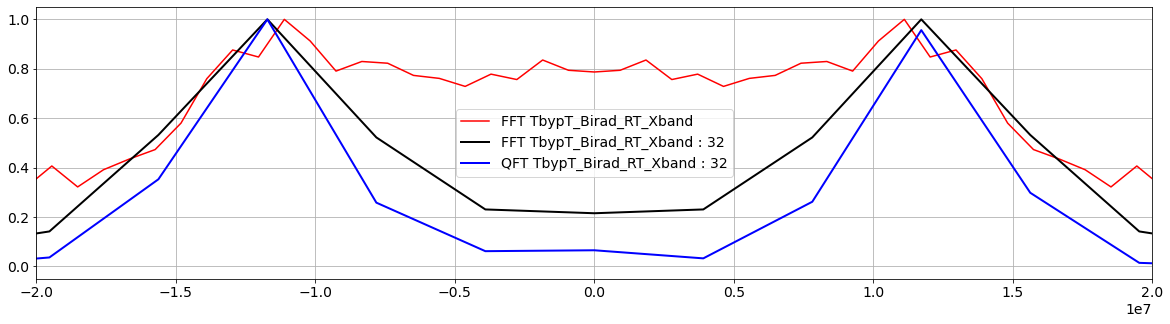

In [177]:
plt.figure(figsize=(20, 5))
plt.xlim((-2e7, 2e7))
plt.plot(FR1x, FR1y, label="FFT TbypT_Birad_RT_Xband", c='red')
plt.plot(FR132x, FR132y, label="FFT TbypT_Birad_RT_Xband : 32", lw=2, c='black')
plt.plot(QR132x, QR132y, label="QFT TbypT_Birad_RT_Xband : 32", lw=2, c='blue')
plt.grid()
plt.legend()
plt.show()

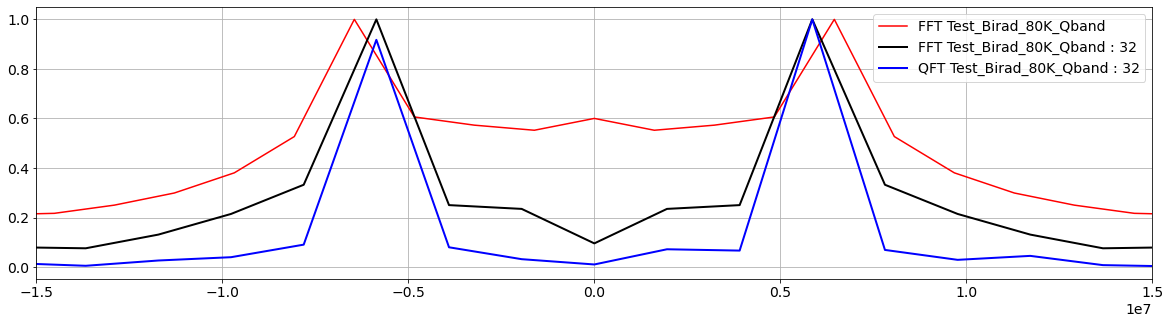

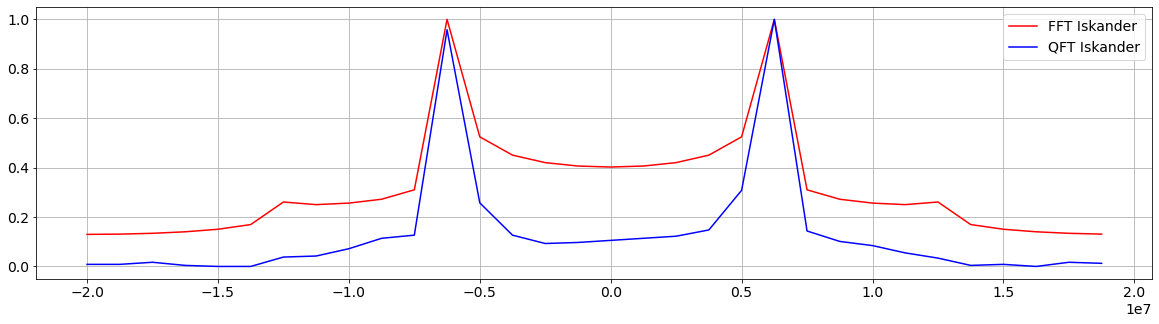

In [178]:
plt.figure(figsize=(20, 5))
plt.xlim((-1.5e7, 1.5e7))
plt.plot(FR2x, FR2y, label="FFT Test_Birad_80K_Qband", c='red')
plt.plot(FR232x, FR232y, label="FFT Test_Birad_80K_Qband : 32", lw=2, c='black')
plt.plot(*norm(QR232x[6:-6], QR232y[6:-6]), label="QFT Test_Birad_80K_Qband : 32", lw=2, c='blue')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))

plt.plot(FI0x, FI0y, label="FFT Iskander", c='red')
plt.plot(QI0x, QI0y, label="QFT Iskander", c='blue')
plt.grid()
plt.legend()
plt.show()

In [179]:
def pairwise_average(data):
    v = (data[0::2] + data[1::2]) / 2
    r = np.zeros(data.shape)
    r[::2] = v
    r[1::2] = v
    return r

In [183]:
AI0y = pairwise_average(I0y)
AR032y = pairwise_average(R032y)
AR132y = pairwise_average(R132y)
AR232y = pairwise_average(R232y)

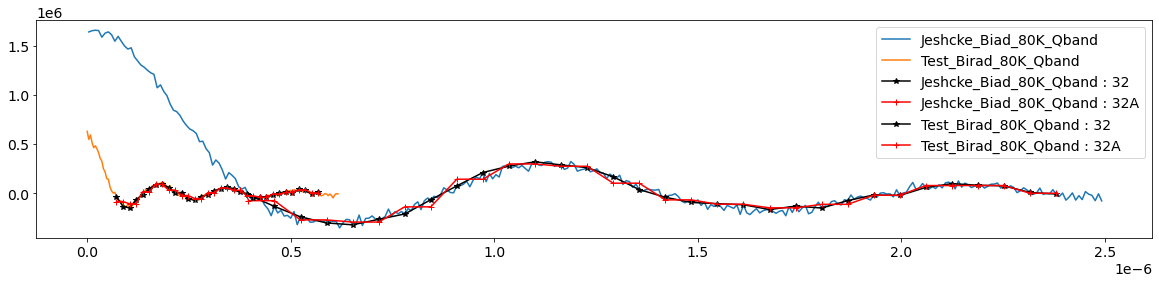

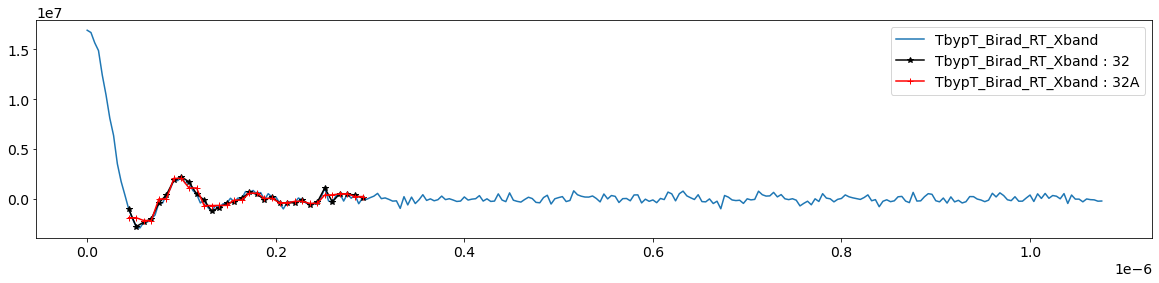

In [184]:
plt.figure(figsize=(20, 4))
plt.plot(R0x, R0y, label='Jeshcke_Biad_80K_Qband')
plt.plot(R2x, R2y, label='Test_Birad_80K_Qband')
plt.plot(R032x, R032y, label='Jeshcke_Biad_80K_Qband : 32', c='black', marker="*")
plt.plot(R032x, AR032y, label='Jeshcke_Biad_80K_Qband : 32A', c='red', marker="+")
plt.plot(R232x, R232y, label='Test_Birad_80K_Qband : 32', c='black', marker="*")
plt.plot(R232x, AR232y, label='Test_Birad_80K_Qband : 32A', c='red', marker="+")
plt.legend()
plt.show()
plt.figure(figsize=(20, 4))
plt.plot(R1x, R1y, label='TbypT_Birad_RT_Xband')
plt.plot(R132x, R132y, label='TbypT_Birad_RT_Xband : 32', c='black', marker="*")
plt.plot(R132x, AR132y, label='TbypT_Birad_RT_Xband : 32A', c='red', marker="+")
plt.legend()
plt.show()

In [185]:
CI0A = get_circuit(AI0y)
CR0A = get_circuit(AR032y)
CR1A = get_circuit(AR132y)
CR2A = get_circuit(AR232y)

Required qubits: 5
Required qubits: 5
Required qubits: 5
Required qubits: 5


In [186]:
CTI0A = transpile(CI0A, backend=SIMULATOR)
CTR0A = transpile(CR0A, backend=SIMULATOR)
CTR1A = transpile(CR1A, backend=SIMULATOR)
CTR2A = transpile(CR2A, backend=SIMULATOR)
print("Iskander:", CTI0A.depth())
print("Jeshcke_Biad_80K_Qband:", CTR0A.depth())
print("TbypT_Birad_RT_Xband:", CTR1A.depth())
print("Test_Birad_80K_Qband:", CTR2A.depth())

Iskander: 76
Jeshcke_Biad_80K_Qband: 76
TbypT_Birad_RT_Xband: 76
Test_Birad_80K_Qband: 76


In [187]:
do_clean(CTI0A)
print("=========================")
do_clean(CTR0A)
print("=========================")
do_clean(CTR1A)
print("=========================")
do_clean(CTR2A)

-ry-0.086; -ry0.090; -ry0.012; -ry-0.107; 
71
Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Depth: 62
Matching CX pair... -cx; Matching CX pair... -cx; Depth: 56
Matching CX pair... -cx; Depth: 55
Depth: 55
Depth: 55
-ry-0.030; -ry-0.077; -ry0.146; -ry-0.017; -ry-0.020; -ry0.048; 
69
Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Depth: 58
Matching CX pair... -cx; Matching CX pair... -cx; Depth: 52
Matching CX pair... -cx; Depth: 51
Depth: 51
Depth: 51
-ry0.055; -ry0.067; -ry-0.147; -ry-0.068; -ry-0.025; 
70
Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Matching CX pair... -cx; Depth: 56
Matching CX pair... -cx; Matching CX pair... -cx; Depth: 50
Matching CX pair... -cx; Depth: 49
Depth: 49
Depth: 49
-ry-0.067; -ry0.140; -ry0.095; -ry0.113; -ry-0.110; -ry0.092; 
69
Matching CX p

In [191]:
result = run_azure_ionq(CTI0A, qpu=QASM, shots=1000)
HCTI0A = result.get_counts()

result = run_azure_ionq(CTR0A, qpu=QASM, shots=1000)
HCTR0A = result.get_counts()

result = run_azure_ionq(CTR1A, qpu=QASM, shots=1000)
HCTR1A = result.get_counts()

result = run_azure_ionq(CTR2A, qpu=QASM, shots=1000)
HCTR2A = result.get_counts()

print("Iskander =", HCTI0A)
print("Jeshcke_Biad_80K_Qband =", HCTR00)
print("TbypT_Birad_RT_Xband =", HCTR10)
print("Test_Birad_80K_Qband =", HCTR20)

QI0Ax, QI0Ay = to_values(FI0x, HCTI0A, reorder=True)
QR032Ax, QR032Ay = to_values(FR032x, HCTR0A, reorder=True)
QR132Ax, QR132Ay = to_values(FR132x, HCTR1A, reorder=True)
QR232Ax, QR232Ay = to_values(FR232x, HCTR2A, reorder=True)

local simulation
local simulation
local simulation
local simulation
Iskander = {'00100': 54, '00111': 58, '10100': 151, '01100': 28, '01110': 3, '01010': 14, '01000': 37, '00110': 13, '10111': 45, '00000': 35, '11011': 170, '01101': 19, '11111': 41, '00011': 11, '10000': 38, '00010': 13, '11000': 42, '01011': 25, '10101': 42, '11010': 53, '10011': 11, '11100': 16, '10110': 3, '01111': 34, '11101': 11, '10010': 15, '11001': 4, '00101': 13, '01001': 1}
Jeshcke_Biad_80K_Qband = {'01000': 416, '01111': 386, '10111': 30, '11111': 66, '10000': 56, '11000': 23, '00100': 3, '01011': 2, '10101': 3, '11001': 1, '10100': 2, '00000': 6, '00010': 1, '00110': 1, '10011': 1, '00011': 1, '11010': 2, '00001': 0, '00101': 0, '00111': 0, '01001': 0, '01010': 0, '01100': 0, '01101': 0, '01110': 0, '10001': 0, '10010': 0, '10110': 0, '11011': 0, '11100': 0, '11101': 0, '11110': 0}
TbypT_Birad_RT_Xband = {'10111': 275, '00110': 9, '11000': 263, '01111': 71, '10010': 3, '00111': 97, '00101': 14, '10011': 4, 

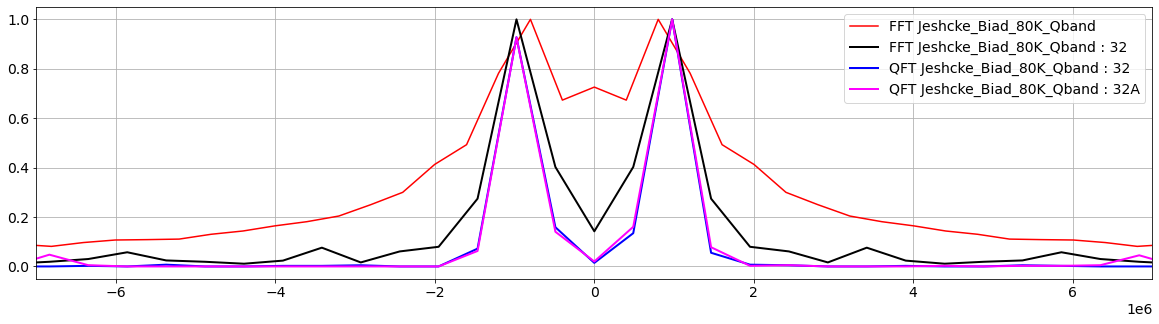

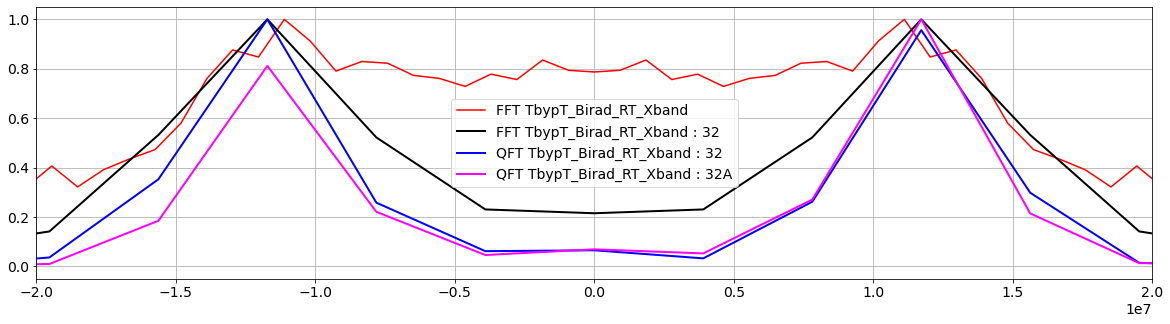

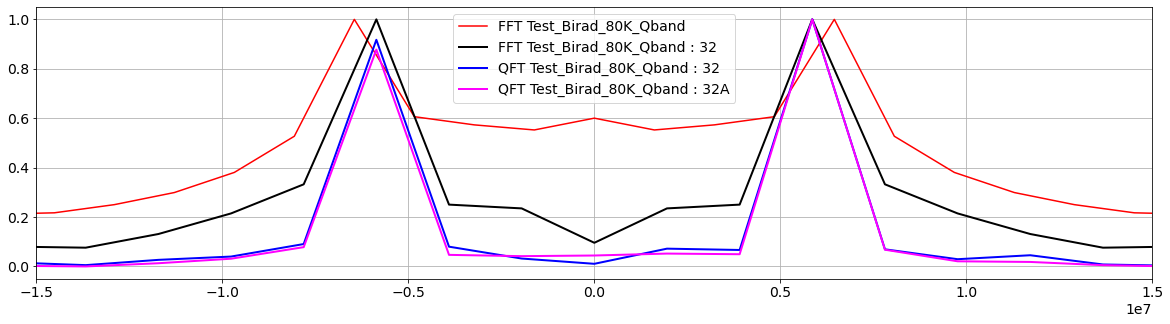

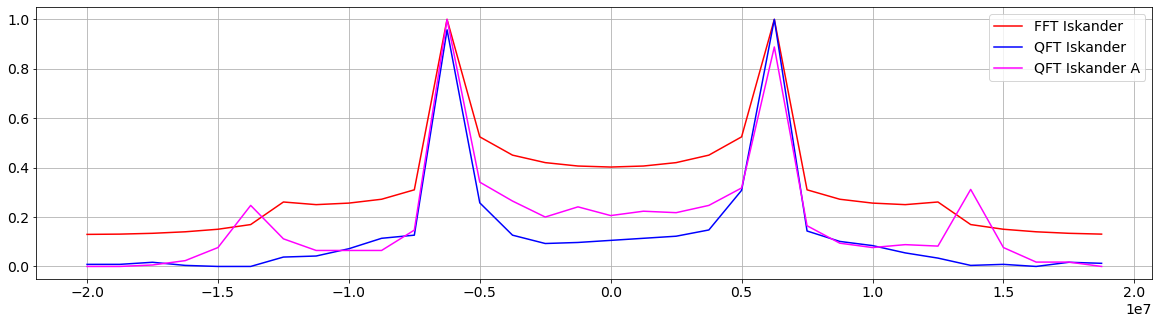

In [195]:
plt.figure(figsize=(20, 5))
plt.xlim((-7e6, 7e6))
plt.plot(FR0x, FR0y, label="FFT Jeshcke_Biad_80K_Qband", c='red')
plt.plot(FR032x, FR032y, label="FFT Jeshcke_Biad_80K_Qband : 32", lw=2, c='black')
plt.plot(QR032x, QR032y, label="QFT Jeshcke_Biad_80K_Qband : 32", lw=2, c='blue')
plt.plot(QR032Ax, QR032Ay, label="QFT Jeshcke_Biad_80K_Qband : 32A", lw=2, c='magenta')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.xlim((-2e7, 2e7))
plt.plot(FR1x, FR1y, label="FFT TbypT_Birad_RT_Xband", c='red')
plt.plot(FR132x, FR132y, label="FFT TbypT_Birad_RT_Xband : 32", lw=2, c='black')
plt.plot(QR132x, QR132y, label="QFT TbypT_Birad_RT_Xband : 32", lw=2, c='blue')
plt.plot(QR132Ax, QR132Ay, label="QFT TbypT_Birad_RT_Xband : 32A", lw=2, c='magenta')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.xlim((-1.5e7, 1.5e7))
plt.plot(FR2x, FR2y, label="FFT Test_Birad_80K_Qband", c='red')
plt.plot(FR232x, FR232y, label="FFT Test_Birad_80K_Qband : 32", lw=2, c='black')
plt.plot(QR232x, QR232y, label="QFT Test_Birad_80K_Qband : 32", lw=2, c='blue')
plt.plot(QR232Ax, QR232Ay, label="QFT Test_Birad_80K_Qband : 32A", lw=2, c='magenta')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))

plt.plot(FI0x, FI0y, label="FFT Iskander", c='red')
plt.plot(QI0x, QI0y, label="QFT Iskander", c='blue')
plt.plot(QI0Ax, QI0Ay, label="QFT Iskander A", c='magenta')
plt.grid()
plt.legend()
plt.show()

In [ ]:
result = run_azure_ionq(CTI0A, qpu=QPU, shots=1000)
HCTI0AF = result.get_counts()

print("!!!!!!!!!!!!!!!!!!!!!!!!!")

result = run_azure_ionq(CTR0A, qpu=QPU, shots=1000)
HCTR0AF = result.get_counts()

print("!!!!!!!!!!!!!!!!!!!!!!!!!")

result = run_azure_ionq(CTR1A, qpu=QPU, shots=1000)
HCTR1AF = result.get_counts()

print("!!!!!!!!!!!!!!!!!!!!!!!!!")

result = run_azure_ionq(CTR2A, qpu=QPU, shots=1000)
HCTR2AF = result.get_counts()

print("!!!!!!!!!!!!!!!!!!!!!!!!!")

In [197]:
print("Iskander =", HCTI0AF)
print("Jeshcke_Biad_80K_Qband =", HCTR0AF)
print("TbypT_Birad_RT_Xband =", HCTR1AF)
print("Test_Birad_80K_Qband =", HCTR2AF)

QI0AFx, QI0AFy = to_values(FI0x, HCTI0AF, reorder=True)
QR032AFx, QR032AFy = to_values(FR032x, HCTR0AF, reorder=True)
QR132AFx, QR132AFy = to_values(FR132x, HCTR1AF, reorder=True)
QR232AFx, QR232AFy = to_values(FR232x, HCTR2AF, reorder=True)

Iskander = {'00000': 26, '00001': 26, '00010': 27, '00011': 29, '00100': 44, '00101': 30, '00110': 19, '00111': 38, '01000': 42, '01001': 26, '01010': 22, '01011': 46, '01100': 29, '01101': 55, '01110': 32, '01111': 31, '10000': 38, '10001': 30, '10010': 22, '10011': 24, '10100': 52, '10101': 37, '10110': 24, '10111': 41, '11000': 35, '11001': 27, '11010': 17, '11011': 36, '11100': 17, '11101': 34, '11110': 12, '11111': 32}
Jeshcke_Biad_80K_Qband = {'00000': 26, '00001': 35, '00010': 27, '00011': 30, '00100': 44, '00101': 21, '00110': 16, '00111': 24, '01000': 118, '01001': 68, '01010': 35, '01011': 35, '01100': 27, '01101': 39, '01110': 31, '01111': 65, '10000': 35, '10001': 32, '10010': 13, '10011': 24, '10100': 19, '10101': 17, '10110': 18, '10111': 13, '11000': 39, '11001': 24, '11010': 14, '11011': 17, '11100': 18, '11101': 33, '11110': 16, '11111': 27}
TbypT_Birad_RT_Xband = {'00000': 29, '00001': 31, '00010': 30, '00011': 27, '00100': 52, '00101': 19, '00110': 22, '00111': 25, '

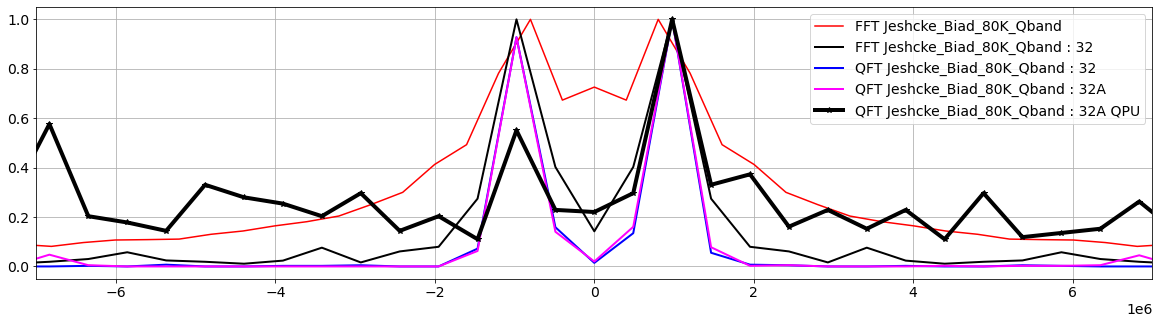

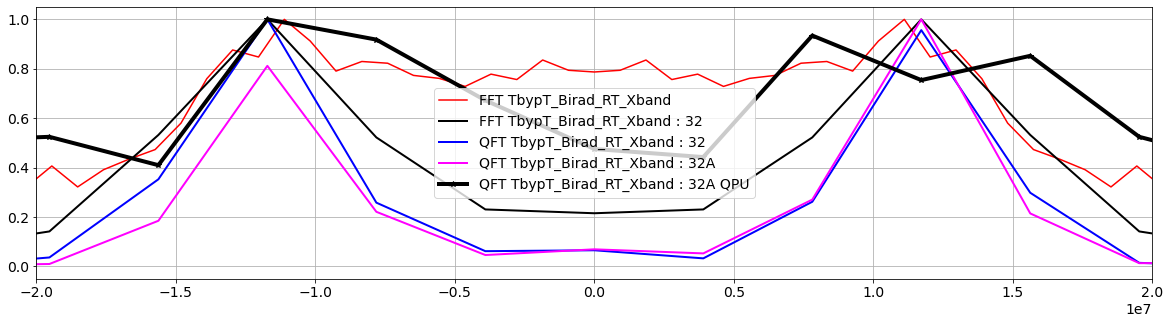

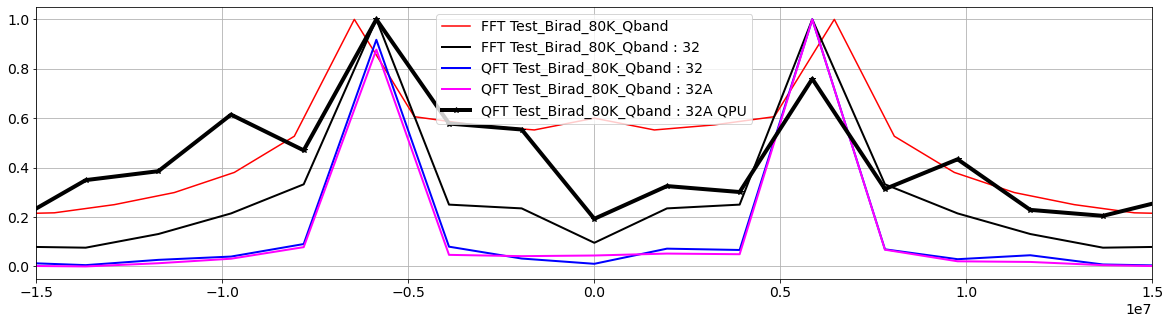

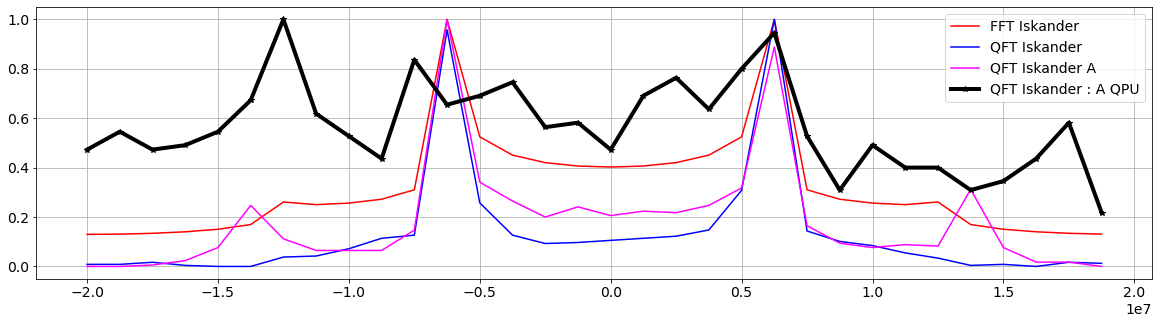

In [198]:
plt.figure(figsize=(20, 5))
plt.xlim((-7e6, 7e6))
plt.plot(FR0x, FR0y, label="FFT Jeshcke_Biad_80K_Qband", c='red')
plt.plot(FR032x, FR032y, label="FFT Jeshcke_Biad_80K_Qband : 32", lw=2, c='black')
plt.plot(QR032x, QR032y, label="QFT Jeshcke_Biad_80K_Qband : 32", lw=2, c='blue')
plt.plot(QR032Ax, QR032Ay, label="QFT Jeshcke_Biad_80K_Qband : 32A", lw=2, c='magenta')
plt.plot(QR032AFx, QR032AFy, label="QFT Jeshcke_Biad_80K_Qband : 32A QPU", lw=4, c='black', marker="*")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.xlim((-2e7, 2e7))
plt.plot(FR1x, FR1y, label="FFT TbypT_Birad_RT_Xband", c='red')
plt.plot(FR132x, FR132y, label="FFT TbypT_Birad_RT_Xband : 32", lw=2, c='black')
plt.plot(QR132x, QR132y, label="QFT TbypT_Birad_RT_Xband : 32", lw=2, c='blue')
plt.plot(QR132Ax, QR132Ay, label="QFT TbypT_Birad_RT_Xband : 32A", lw=2, c='magenta')
plt.plot(QR132AFx, QR132AFy, label="QFT TbypT_Birad_RT_Xband : 32A QPU", lw=4, c='black', marker="*")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.xlim((-1.5e7, 1.5e7))
plt.plot(FR2x, FR2y, label="FFT Test_Birad_80K_Qband", c='red')
plt.plot(FR232x, FR232y, label="FFT Test_Birad_80K_Qband : 32", lw=2, c='black')
plt.plot(QR232x, QR232y, label="QFT Test_Birad_80K_Qband : 32", lw=2, c='blue')
plt.plot(QR232Ax, QR232Ay, label="QFT Test_Birad_80K_Qband : 32A", lw=2, c='magenta')
plt.plot(QR232AFx, QR232AFy, label="QFT Test_Birad_80K_Qband : 32A QPU", lw=4, c='black', marker="*")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))

plt.plot(FI0x, FI0y, label="FFT Iskander", c='red')
plt.plot(QI0x, QI0y, label="QFT Iskander", c='blue')
plt.plot(QI0Ax, QI0Ay, label="QFT Iskander A", c='magenta')
plt.plot(QI0AFx, QI0AFy, label="QFT Iskander : A QPU", lw=4, c='black', marker="*")
plt.grid()
plt.legend()
plt.show()